In [2]:
import scanpy as sc
import matplotlib as mpl

In [3]:
# 设置参数
mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

In [4]:
adata = sc.read("./anndata_ora_anno.h5ad")

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
adata

AnnData object with n_obs × n_vars = 75407 × 1000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'origin', 'sample', 'CellType', 'sex', 'NAC', 'NACres', 'patho', 'T_score', 'N_score', 'ly', 'v', 'rec', 'subtype', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'nCount_SCT', 'nFeature_SCT', 'chemo', 'chemo_detail', 'integrated_snn_res.0.9', 'seurat_clusters', 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'discard', 'n_genes', 'doublet_score', 'predicted_doublet', 'size_factors', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0_25', 'leiden_0_5', 'lei

Storing dendrogram info using `.uns['dendrogram_ora_annotation_group']`


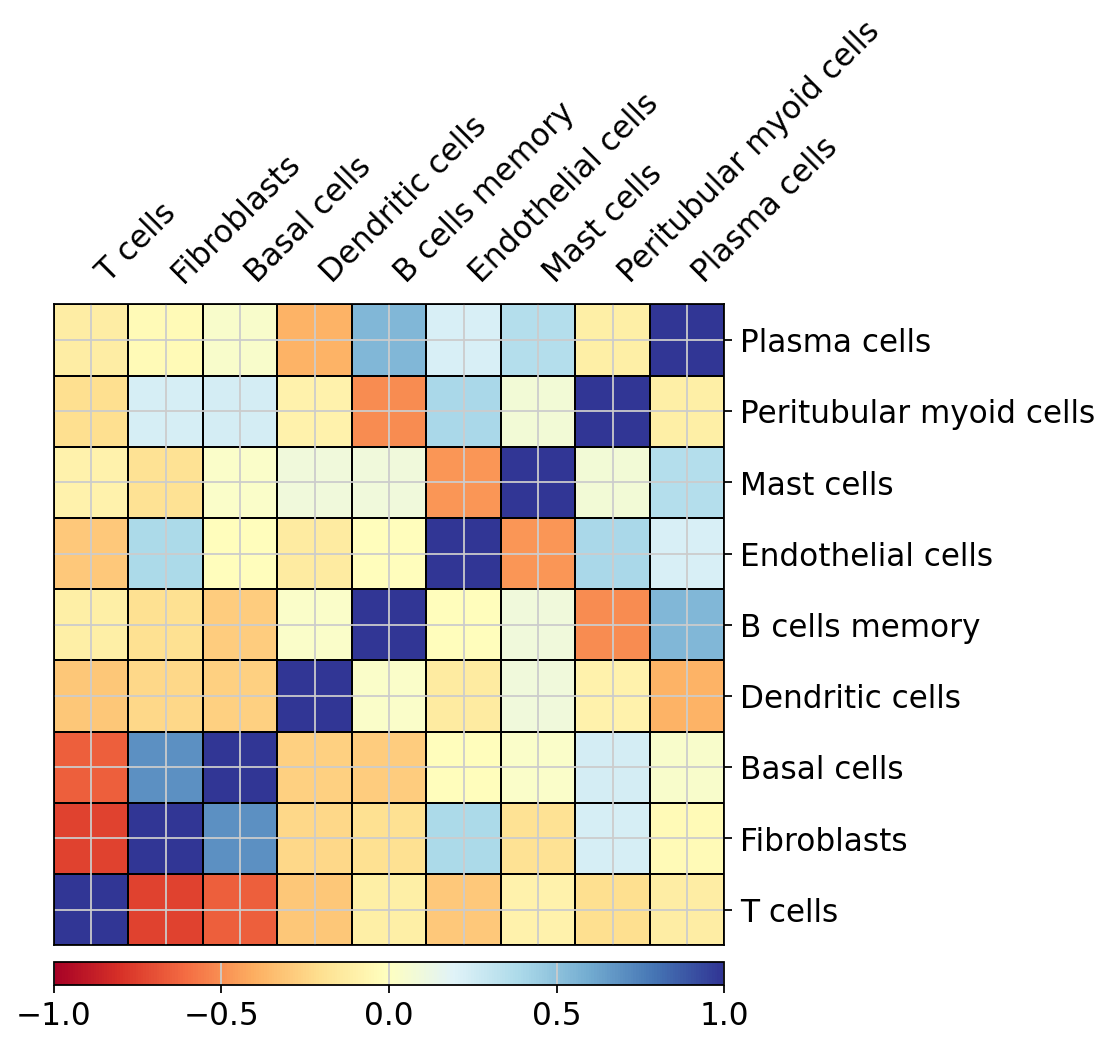

In [8]:
sc.tl.dendrogram(
    adata,
    groupby=["ora_annotation", "group"],
    use_rep="X_pca",
    cor_method="pearson",
    use_raw=False,
)

sc.pl.correlation_matrix(
    adata,
    "ora_annotation",
    dendrogram=False,
    cmap="RdYlBu",
    # show_correlation_numbers=True,
    # figsize=(5, 3.5),
    save="细胞间相关性.pdf",
)

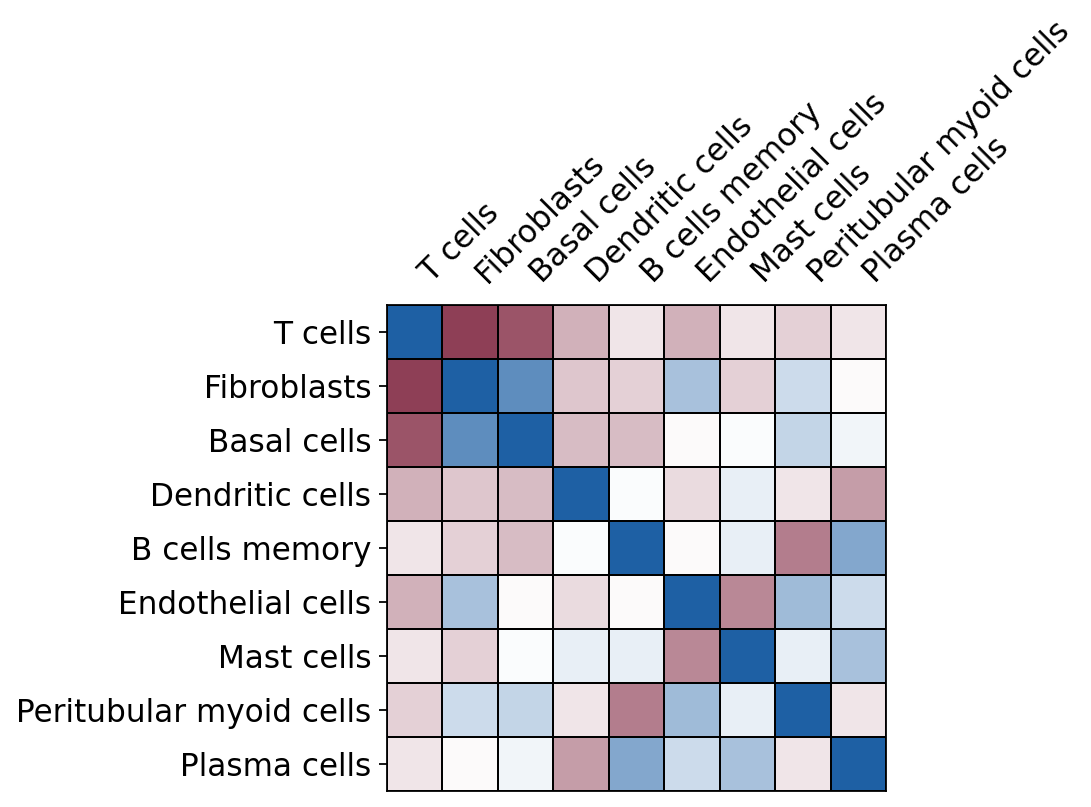

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 定义自定义颜色映射#B51F2E
colors = ["#6A011F", "#FFFFFF", "#1E60A4"]  # 从蓝色到白色再到红色的渐变
cmap_name = "custom_blue_white_red"  # 定义颜色映射名称
custom_cmap = LinearSegmentedColormap.from_list(
    cmap_name, colors, N=50
)  # 创建颜色映射对象

# 使用自定义颜色映射绘制相关性矩阵
fig, ax = plt.subplots()
sc.pl.correlation_matrix(adata, "ora_annotation", ax=ax, show=False, cmap=custom_cmap)

# 将纵轴标签移动到左侧
ax.invert_yaxis()
ax.yaxis.tick_left()
ax.grid(False)  # Disable grid lines
plt.savefig("./figures/20-细胞类型相关性分析.pdf")
# 显示图形
plt.show()